In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [9]:
path = '../dataset'
X_ = np.load(f'{path}/train/arr_X.npy').reshape(-1,1800)
Y_ = np.load(f'{path}/train/arr_Y.npy')

In [32]:
num_shots=370
num_class=6
X = []
Y = np.array([])
for i in range(num_class):
    idx = np.random.choice(len(Y_[Y_==i]), num_shots, replace=False)
    X.append(X_[Y_==i][idx])
    Y = np.hstack([Y, np.ones(num_shots)*i])
X = np.reshape(X, (-1,1800))

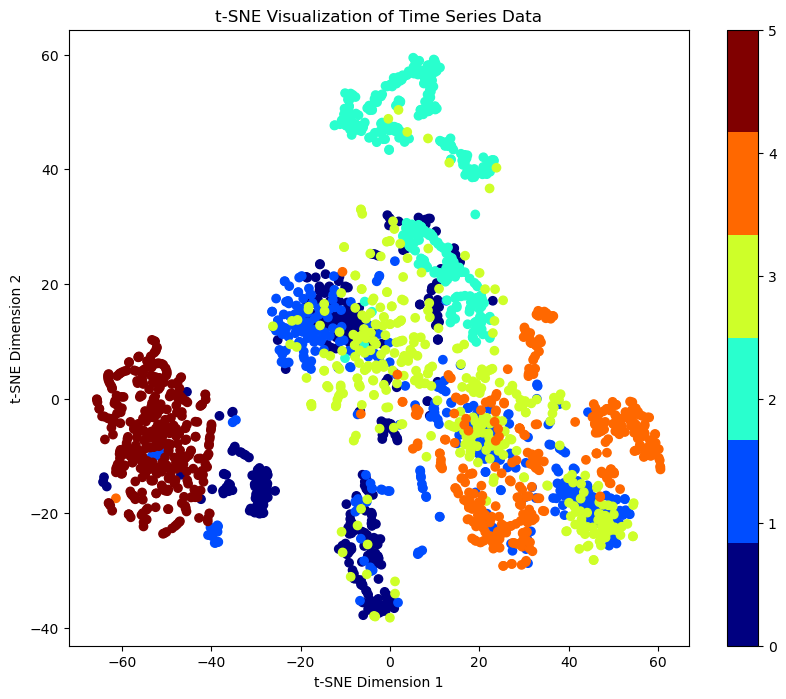

In [33]:
# N = 1000  # 데이터 개수
# time_series_data = np.random.rand(N, 1800).astype(np.float32)  # 시계열 데이터, float32 형태
# class_labels = np.random.randint(0, 10, N).astype(np.int32)  # 분류 클래스 데이터, int32 형태

# t-SNE로 시각화
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(np.array(X))

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=Y, cmap=plt.cm.get_cmap("jet", num_class))
plt.colorbar(ticks=range(10))
plt.title("t-SNE Visualization of Time Series Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
